In [2]:
import numpy as np
import sys
import json
import time
import datetime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from image import Image
from emittance_calc import get_normemit

from IPython.display import clear_output


In [3]:
filenames=[]
im_dir = "saved_images/20211006_data/"
for file in os.scandir(im_dir):
    if file.name.endswith(".npy") and file.name.startswith("img_"):
        filenames.append(file.name)
print('Total ',len(filenames),'files')

Total  776 files


In [26]:
im = np.load(f"./saved_images/20211006_data/{filenames[26]}")
for i in range(0):
    print(i)
    new_im = np.load(f"./saved_images/20211006_data/{filenames[20+i]}")
    im = np.mean(np.array([ im,new_im ]), axis=0 )
    beam_image = Image(im, 270, 334, bg_image = None) #ROI found from EPIC S PV (they did not change)
    beam_image.reshape_im()
    plt.imshow(beam_image.proc_image)
    plt.show()

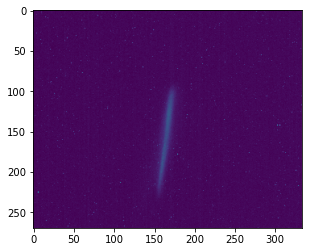

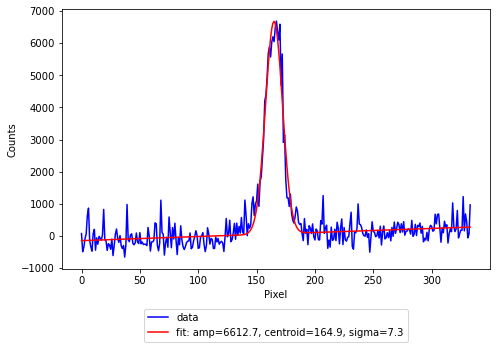

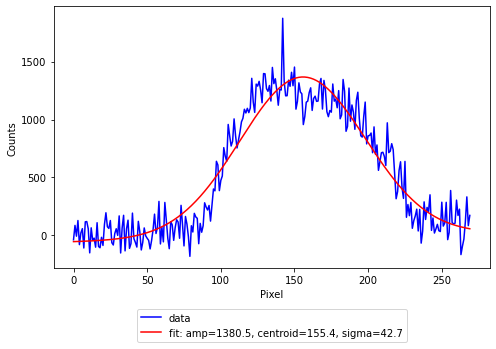

Low x peak amplitude: amp_x = 6612.7, amp_y = 1380.5.


True

In [33]:
# indeces 17, 22, 24, 25, 685
im = np.load(f"./saved_images/20211006_data/{filenames[27]}")
beam_image = Image(im, 270, 334, bg_image = None) #ROI found from EPIC S PV (they did not change)
beam_image.reshape_im()
plt.imshow(beam_image.proc_image)
beam_image.subtract_bg()
beam_image.get_im_projection();
beam_image.get_sizes(show_plots=True)
# time.sleep(3)
# clear_output(wait=True)

In [7]:
0 in [0,1,2,3]


True

# Reproducing last iteration plots (at 10/7 01-19 am)

In [11]:
filen = ['img_10-07_01-19-02.npy',
         'img_10-07_01-19-05.npy',
         'img_10-07_01-19-08.npy',
         'img_10-07_01-19-11.npy',
         'img_10-07_01-19-14.npy',
         'img_10-07_01-19-17.npy',
         'img_10-07_01-19-20.npy',
         'img_10-07_01-19-23.npy',
         'img_10-07_01-19-26.npy',
         'img_10-07_01-19-29.npy',
         'img_10-07_01-19-32.npy',
         'img_10-07_01-19-36.npy',
         'img_10-07_01-19-39.npy',
         'img_10-07_01-19-42.npy',
         'img_10-07_01-19-45.npy']

In [12]:
xrms = []
yrms = []

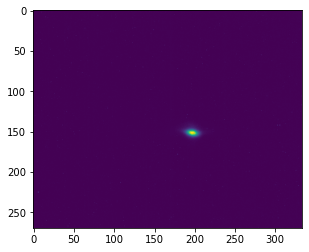

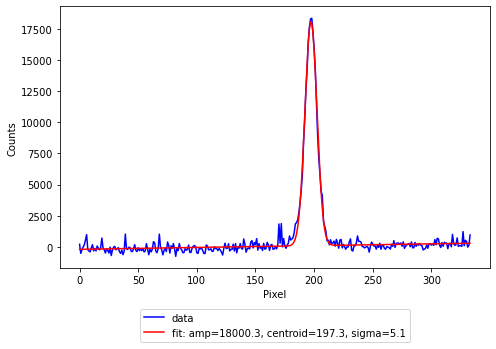

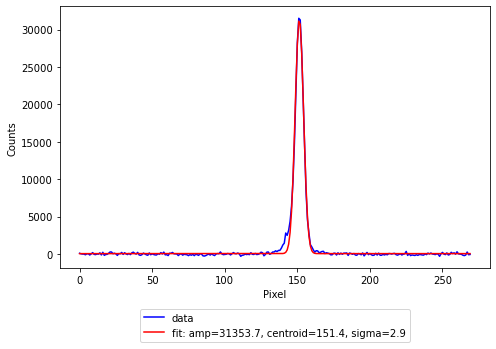

In [13]:
for fname in filen:
    im = np.load(f"./saved_images/{fname}")
    beam_image = Image(im, 270, 334, bg_image = None) #ROI found from EPICS PV (they did not change)
    beam_image.reshape_im()
    beam_image.subtract_bg()
    beam_image.get_im_projection();
    plt.imshow(beam_image.proc_image)
    beamsizes = np.array(beam_image.get_sizes(show_plots=True))[0:2]*12.23*1e-6
    xrms.append(beamsizes[0])
    yrms.append(beamsizes[1])
    #beam_image.get_sizes(show_plots=True)
    #time.sleep(5)
    clear_output(wait=True)

In [4]:
xrms = [0.000275270762890783, 0.00015857861648433088, 7.8114085318436e-05, 6.202270952259292e-05, 6.698022493174537e-05, 9.790930683897423e-05, 0.00015522722653305178, 6.820826458165314e-05, 0.0001657503612876066, 6.0307111941963834e-05, 0.00020132917964263034, 6.703344336232161e-05, 6.611194668552357e-05, 6.138128172512228e-05, 6.236064157421638e-05]

In [5]:
yrms = [0.002146941282941991, 0.0001852785056962596, 6.122663253929481e-05, 3.5301884412073185e-05, 6.989811645565057e-05, 0.00012350977455595215, 0.0001902460983398748, 4.4665250625075415e-05, 0.00019614720893606312, 4.4626566136338495e-05, 0.00024625464331416724, 7.659192253571239e-05, 6.205860139654404e-05, 4.726250975193668e-05, 3.5538991855672705e-05]

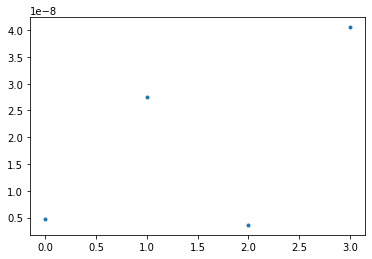

In [6]:
plt.plot(np.array(xrms[-8:-4])**2, linewidth=0, marker=".")

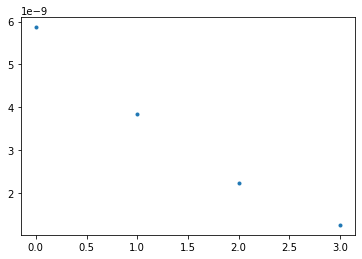

In [7]:
plt.plot(np.array(yrms[-4:])**2, linewidth=0, marker=".")

### Archiver did not log these values! Eye balled them from saved plots during MD

In [8]:
x_k1_range = [-22, -15, -7.5, 0]
y_k1_range = [6.4, 6.9, 7.5, 7.9]

from emittance_calc import get_quad_field
x_b_range = get_quad_field(x_k1_range)
y_b_range = -1*get_quad_field(y_k1_range)

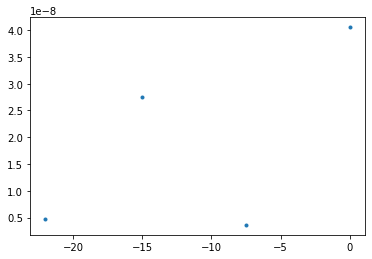

In [9]:
plt.plot(x_k1_range, np.array(xrms[-8:-4])**2, linewidth=0, marker=".")

(-3e-09, 6.1e-09)

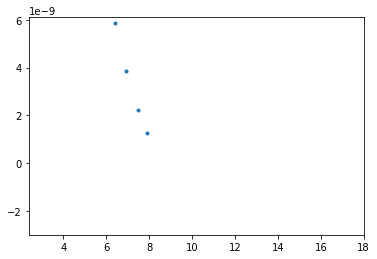

In [10]:
plt.plot(y_k1_range, np.array(yrms[-4:])**2, linewidth=0, marker=".")
plt.xlim(2.4,18)
plt.ylim(-3e-9, 6.1e-9)

## Fitting the data

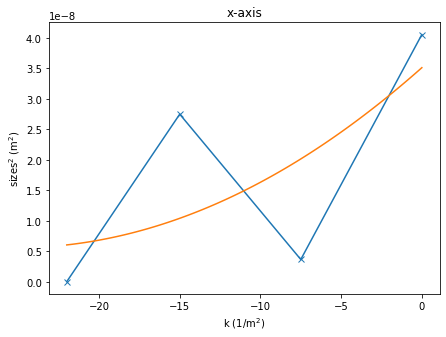

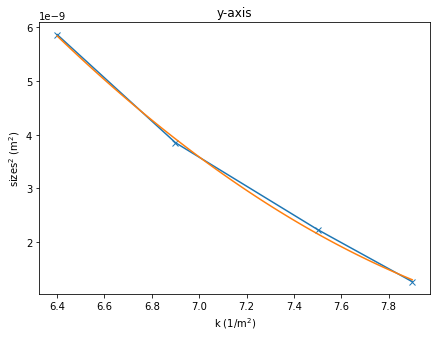

nemitx: 0.24, nemity: 0.23
bmagx: 5.95, bmagy: 9.01


In [21]:
emitx,emity,bmagx,bmagy = get_normemit(0.135, x_b_range, y_b_range, xrms[-8:-4], yrms[-4:],\
                                       adapt_ranges=False, show_plots=True)

### Can't reproduce y emittance fit for some reason: not sure why, maybe quad range? or something in the adapt_range fn that I can't reproduce here

# Reproducing last iteration plots (at 10/7 01-19 am)

In [2]:
filen = ['img_10-07_00-45-16.npy', # -9, -7
         'img_10-07_00-45-19.npy', # -5
         'img_10-07_00-45-22.npy', # -3
         'img_10-07_00-45-25.npy', # -2
         'img_10-07_00-45-28.npy', # -1
         'img_10-07_00-45-31.npy', # -4.387
         'img_10-07_00-45-34.npy', # -4.253
         'img_10-07_00-45-37.npy', # -4.118674
         'img_10-07_00-45-40.npy', # -3.985
         'img_10-07_00-45-44.npy', # -3.85
         'img_10-07_00-45-47.npy', # -3.616
         'img_10-07_00-45-50.npy', # -3.616
         'img_10-07_00-45-53.npy', # -4.102
         'img_10-07_00-45-56.npy', # -4.346
         'img_10-07_00-45-59.npy', # -4.588
         'img_10-07_00-46-02.npy'] # -4.588

xrms = []
yrms = []

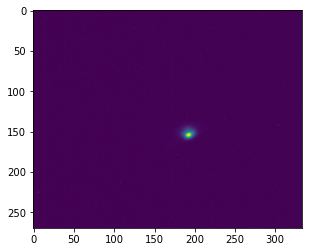

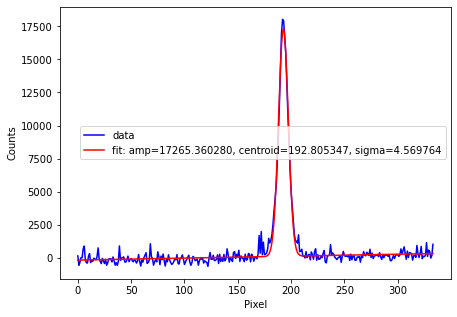

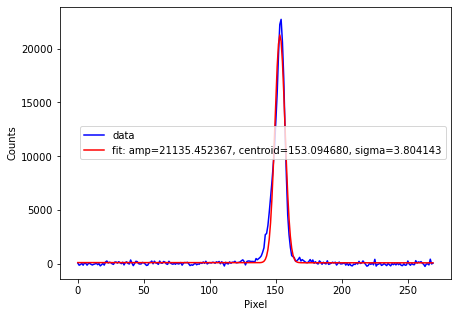

In [3]:
for fname in filen:
    im = np.load(f"./saved_images/{fname}")
    beam_image = Image(im, 270, 334, bg_image = None) #ROI found from EPICS PV (they did not change)
    beam_image.reshape_im()
    beam_image.subtract_bg()
    beam_image.get_im_projection();
    plt.imshow(beam_image.proc_image)
    beamsizes = np.array(beam_image.get_sizes(show_plots=True))[0:2]*12.23*1e-6
    xrms.append(beamsizes[0])
    yrms.append(beamsizes[1])
    #beam_image.get_sizes(show_plots=True)
    #time.sleep(5)
    clear_output(wait=True)

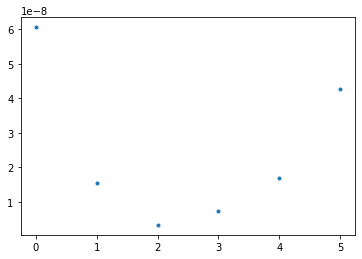

In [4]:
plt.plot(np.array(xrms[:-10])**2, linewidth=0, marker=".")

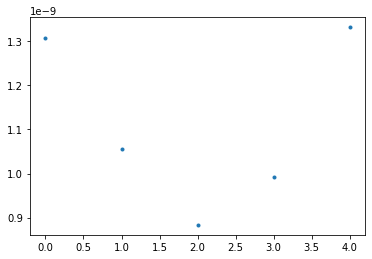

In [5]:
plt.plot(np.array(yrms[-10:-5])**2, linewidth=0, marker=".")

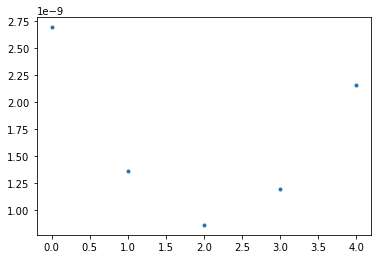

In [6]:
plt.plot(np.array(yrms[-5:])**2, linewidth=0, marker=".")

In [4]:
x_b_range = [-7, -5, -3, -2, -1, 0]
x2_b_range = [-4.387, -4.253, -4.1187, -3.985, -3.85, -3.616]
y_b_range = [-3.616, -4.102, -4.346, -4.588, -4.588]


[-8.41407581 -7.9854258 ]


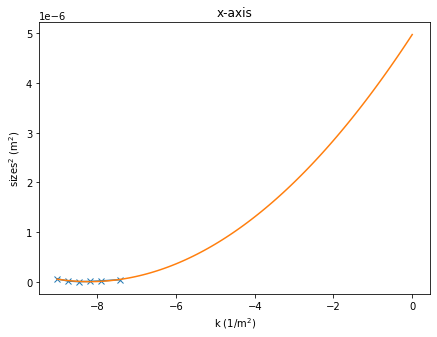

[7.67526394 9.73288219]


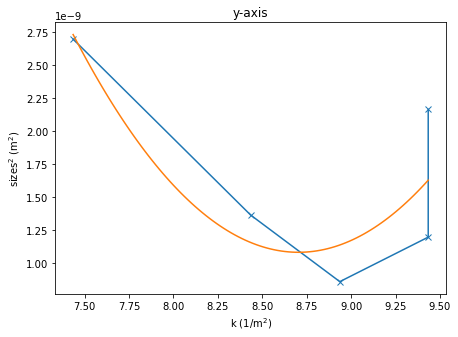

nemitx: 7.59, nemity: 0.50
bmagx: 65.87, bmagy: 5.05


In [5]:
emitx,emity,bmagx,bmagy = get_normemit(0.135, x2_b_range, y_b_range, xrms[:-10], yrms[-5:], \
                                       adapt_ranges=True, show_plots=True)

=========================================================

In [6]:
import epics
epics.caget("OTRS:IN20:571:ROI_YNP") # col

270

In [7]:
epics.caget("OTRS:IN20:571:ROI_XNP") # row

334

# Fixing fitting failures

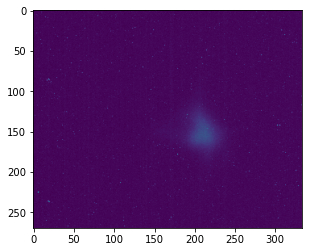

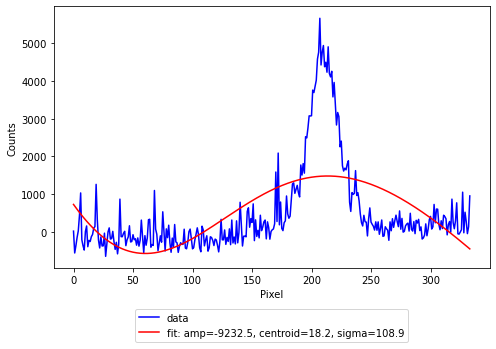

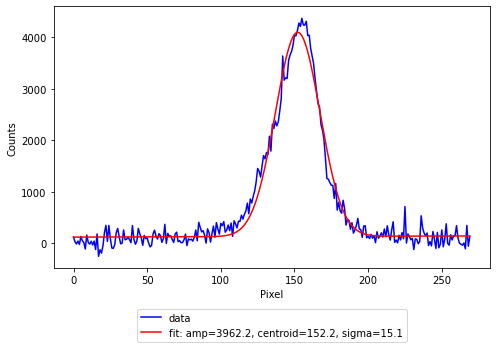

(108.9150484667927, 15.149611296630427, 22.7634965370987, 0.2087895527102861)

In [14]:
filen = ['img_10-07_01-19-02.npy',
         'img_10-07_01-19-05.npy',
         'img_10-07_01-19-08.npy',
         'img_10-07_01-19-11.npy',
         'img_10-07_01-19-14.npy',
         'img_10-07_01-19-17.npy',
         'img_10-07_01-19-20.npy',
         'img_10-07_01-19-23.npy',
         'img_10-07_01-19-26.npy',
         'img_10-07_01-19-29.npy',
         'img_10-07_01-19-32.npy',
         'img_10-07_01-19-36.npy',
         'img_10-07_01-19-39.npy',
         'img_10-07_01-19-42.npy',
         'img_10-07_01-19-45.npy']

fname = filen[1]
im = np.load(f"./saved_images/{fname}")
beam_image = Image(im, 270, 334, bg_image = None) #ROI found from EPICS PV (they did not change)
beam_image.reshape_im()
beam_image.subtract_bg()
beam_image.get_im_projection();
plt.imshow(beam_image.proc_image)
beam_image.get_sizes(show_plots=True)
